# GOOGLE PLAY STORE REVIEW ANALYSATION

## Part 1. Giới thiệu

*Về Google Play Store*

*Google Play* là một dịch vụ phân phối kỹ thuật số được điều hành và phát triển bởi Google LLC. Nó đóng vai trò là kho ứng dụng chính thức cho hệ điều hành Android, cho phép người dùng duyệt và tải xuống các ứng dụng được phát triển với bộ công cụ phát triển phần mềm Android (SDK) và được xuất bản thông qua Google. Google Play cũng phục vụ như một cửa hàng truyền thông kỹ thuật số, cung cấp âm nhạc, sách, phim và chương trình truyền hình. 
Các ứng dụng có sẵn thông qua Google Play bao gồm cả miễn phí hoặc có tính phí. 
Tính đến năm 2017, Google Play có hơn 3,5 triệu ứng dụng Android. Người dùng ở hơn 145 quốc gia có thể mua & sử dụng các ứng dụng Google Play.

*Nguồn dữ liệu*
Dữ liệu này được lấy từ Google Play Store trong khoảng thời gian đầu năm 2018. 



## Part 2. Giải thích các biến số

- Name:  Tên ứng dụng trên Google Play
- Categary:  Phân loại ứng dụng dựa vào chức năng tương ứng
- Rating:  Mức độ đánh giá (gọi là số sao) trung bình được người dùng bình chọn trên Google Play (từ 0 - 5 sao)
- Reviews:  Số lượt phản hồi về ứng dụng từ phía người dùng tới nhà phát hành ứng dụng
- Size:  kích thước (dung lượng) ứng dụng
- Install:  số lượt tải về và cài đặt ứng dụng
- Type:  thuộc loại ứng dụng trả phí (Paid) hoặc miễn phí (Free)
- Price:  Số tiền phải trả để mua ứng dụng. Price là 0 nếu Type là Free, Price khác 0 nếu Type là Paid. Price được tính theo đơn vị $
- Content Rating :  Phạm vi người dùng được khuyến khích bởi nhà phát hành ứng dụng, có thể kèm theo độ tuổi
- Genres :  loại (lĩnh vực) của ứng dụng
- Last Updated :  ngày gần nhất mà ứng dụng được cập nhật bởi nhà phát hành
- Current Ver :  phiên bản hiện tại của ứng dụng
- Android Ver :  phiên bản Android tương thích với ứng dụng được khuyến khích bởi nhà phát hành

## Part 3. Các thư viện sử dụng 

In [73]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py
import seaborn as sns
import squarify
import warnings
warnings.filterwarnings('ignore')

## Part 4. Đọc dữ liệu từ dataset 

*(Dữ liệu này gồm 13 cột, 10841 dòng)*

In [7]:
df = pd.read_csv('data/googleplaystore.csv')
df.head(5).append(df.tail(5))

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Facebook,SOCIAL,4.1,78158306,-1.00,"1,000,000,000",Free,0,Teen,Social,3-Aug-18,Varies with device,Varies with device
1,Facebook,SOCIAL,4.1,78128208,-1.00,"1,000,000,000",Free,0,Teen,Social,3-Aug-18,Varies with device,Varies with device
2,WhatsApp Messenger,COMMUNICATION,4.4,69119316,-1.00,"1,000,000,000",Free,0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
3,WhatsApp Messenger,COMMUNICATION,4.4,69119316,-1.00,"1,000,000,000",Free,0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
4,WhatsApp Messenger,COMMUNICATION,4.4,69109672,-1.00,"1,000,000,000",Free,0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
10835,FQ India,LIFESTYLE,NaN,0,8.90,10,Free,0,Everyone,Lifestyle,31-Jul-18,7.2.2,4.1 and up
10836,Miss FQ,NEWS_AND_MAGAZINES,NaN,0,36.00,10,Free,0,Everyone,News & Magazines,5-Apr-18,3.8,4.4 and up
10837,Word Search Tab 1 FR,FAMILY,NaN,0,1.02,50,Paid,$1.04,Everyone,Puzzle,6-Feb-12,1.1,3.0 and up
10838,PLMGSS FR,PRODUCTIVITY,NaN,0,3.10,10,Free,0,Everyone,Productivity,1-Dec-17,1,4.4 and up
10839,FR Forms,BUSINESS,NaN,0,9.60,10,Free,0,Everyone,Business,29-Sep-16,1.1.5,4.0 and up


## Part 5. Cấu trúc của dữ liệu

In [8]:
df.describe().T.style.set_properties(**{'background-color': 'black','color': 'white','border-color': 'red'})

,count,mean,std,min,25%,50%,75%,max
Rating,9366.000000,4.191757,0.515219,1.000000,4.000000,4.300000,4.500000,5.000000
Reviews,10840.000000,444152.896033,2927760.603886,0.000000,38.000000,2094.000000,54775.500000,78158306.000000
Size,10840.000000,17.995725,22.301232,-1.000000,2.600000,9.200000,26.000000,100.000000


## Part 6. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


*Kết quả cho thấy dataset có tổng cộng 10841 dòng, với 12 cột. Không có cột nào có giá trị null.*

In [10]:
df.nunique()

App               9659
Category            33
Rating              39
Reviews           6001
Size               460
Installs            20
Type                 2
Price               92
Content Rating       6
Genres             119
Last Updated      1377
Current Ver       2783
Android Ver         33
dtype: int64

*Qua kết quả trên cho thấy số trường hợp của các biến phân loại:*
- Category: 34 loại khác nhau
- Type: 3 loại khác nhau
- Content Rating: 6 loại khác nhau
- Genres: 120 loại khác nhau

**Xử lí dữ liệu rác và ép kiểu**

Do dữ liệu ở cột **Installs** dùng dấu ',' để phân cách phần thập phân và ở dạng xâu, ta phải thay thế dấu ',' bằng dấu '.' và ép kiểu sang số.

In [11]:
lst = df.Installs.tolist()

n = len(lst)
for i in range(n):
    lst[i] = str(lst[i]).replace(',','')
    
lst.remove("Free") #Có một dòng bị mang giá trị này nên phải xoá bỏ dòng đó để có thể ép kiểu

lst = pd.Series(lst)
df.Installs = lst

df.Installs = df.Installs.astype(float)

ValueError: list.remove(x): x not in list

Chuyển dữ liệu cột **Size** (MB) sang dạng float

In [ ]:
lst = df.Size.tolist()

lst.remove("1,000+")
lst = pd.Series(lst)
df.Size = lst

df.Size = df.Size.astype(float)

Chuyển dữ liệu ở cột **Reviews** sang dạng float

In [12]:
lst = df.Reviews.tolist()

#lst.remove("3.0M")
lst = pd.Series(lst)
df.Reviews = lst

df.Reviews = df.Reviews.astype(float)

Kiểu dữ liệu của các cột sau khi xử lí:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


## Part 7: Các câu hỏi nghiên cứu

1. Có phải thể loại ứng dụng (Category) ảnh hưởng đến số lượt tải (Installs) của ứng dụng không ?
2. Liệu thể loại ứng dụng (Category) có ảnh hưởng tới độ tuổi quy định của ứng dụng (Content Rating) hay không ?
3. Sự ảnh hưởng của độ tuổi quy định (Content Rating) tới điểm đánh giá ứng dụng (Rating) trên CH play.
4. Liệu có phải có sự khác biệt lớn về điểm đánh giá ứng dụng (Rating) giữa những thể loại ứng dụng (Category) khác nhau hay không ?
5. Các ứng dụng trả phí và không trả phí có sự khác biệt như thế nào về đánh giá của người dùng, liệu có phải những ứng dụng trả phí được đánh giá cao hơn không ? 

## Part 8: Trực quan hoá dữ liệu

## Biểu đồ piechart thể hiện tỉ lệ của các biến phân loại

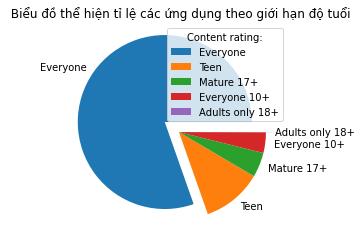

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64


In [14]:
CR_pie = df['Content Rating'].value_counts()

CR_pie_keys = ['Everyone','Teen','Mature 17+','Everyone 10+', 'Adults only 18+','']

CR_pie_explode = [0.2, 0, 0, 0,0, 0.2]

plt.pie(CR_pie.values,labels = CR_pie_keys, explode = CR_pie_explode)

plt.title(" Biểu đồ thể hiện tỉ lệ các ứng dụng theo giới hạn độ tuổi")

plt.legend(title = "Content rating:")

plt.show()

print(CR_pie)

**Qua biểu đồ ta thấy Content Rating (giới  hạn độ tuổi) của các ứng dụng chiếm tỉ lệ từ cao nhất đến thấp nhất là: **
1. Everyone
2. Teen
3. Mature 17+
4. Everyone 10+
5. Adult only 18+

ValueError: 'label' must be of length 'x'

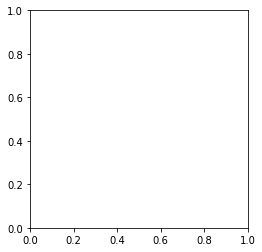

In [15]:
Type_pie = df['Type'].value_counts()

Type_pie_keys = ['Free','Paid','']

Type_pie_explode = [0,0,0]

plt.pie(Type_pie.values,labels = Type_pie_keys, explode = Type_pie_explode)

plt.title(' Biểu đồ thể hiện tỉ lệ các ứng dụng theo tỉ lệ trả phí và không trả phí ')

plt.legend(title = "Type")

plt.show()

print(Type_pie)

**Qua biểu đồ ta thấy Type (Loại ứng dụng) của các ứng dụng chủ yếu là miễn phí, những ứng dụng trả phí chỉ chiếm phần khá nhỏ.**

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(data = df, x = "Installs", y = "Category")
ax.set_xlim(0,100000000)
plt.title('Biểu đồ boxplot thể hiện số lượt tải ứng dụng theo thể loại\n')
plt.show()

**Nhận xét: Qua biểu đồ ta thấy được**
- Hầu như mỗi nhóm thể loại đều có các outlier
- Các outlier có giá trị cách biệt rất lớn với Median của mỗi nhóm
- Những nhóm ứng dụng có tập giá trị phân bố đều nhất là: Communication (Ứng dụng để giao tiếp), Entertainment (Ứng dụng giải trí), Education (Ứng dụng giáo dục), Heath_and_fitness (Ứng dụng cho sức khoẻ & thể hình), Game, Social (Ứng dụng xã hội), Shopping (Ứng dụng mua sắm),....

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(data = df, x = "Content Rating", y = "Rating")
plt.title("Biểu đồ boxplot thể hiện sự phân bố điểm đánh giá (Rating) ứng dụng theo giới hạn độ tuổi\n")
plt.show()

**Nhận xét:**

Qua biểu đồ ta nhận thấy:
- Các ứng dụng cho mọi người (Everyone) có rất nhiều các outlier và rải rác đều.
- Các ứng dụng cho người lớn (Adults only 18+) hoàn toàn không có outlier.
- Các ứng dụng không được phân loại độ tuổi (Unrated) có quá ít nên không thể hiện trên biểu đồ được.

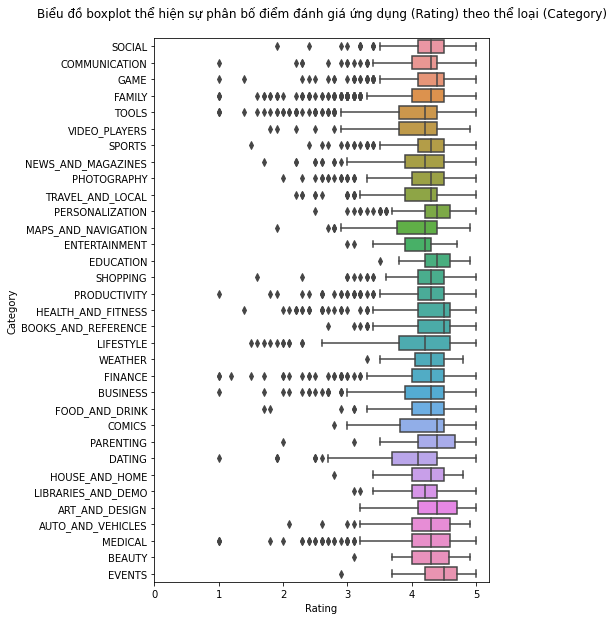

In [16]:
plt.figure(figsize=(6,10))
ax = sns.boxplot(data = df, y = "Category", x = "Rating")
ax.set_xlim(0,5.2)
plt.title('Biểu đồ boxplot thể hiện sự phân bố điểm đánh giá ứng dụng (Rating) theo thể loại (Category)\n')
plt.show()

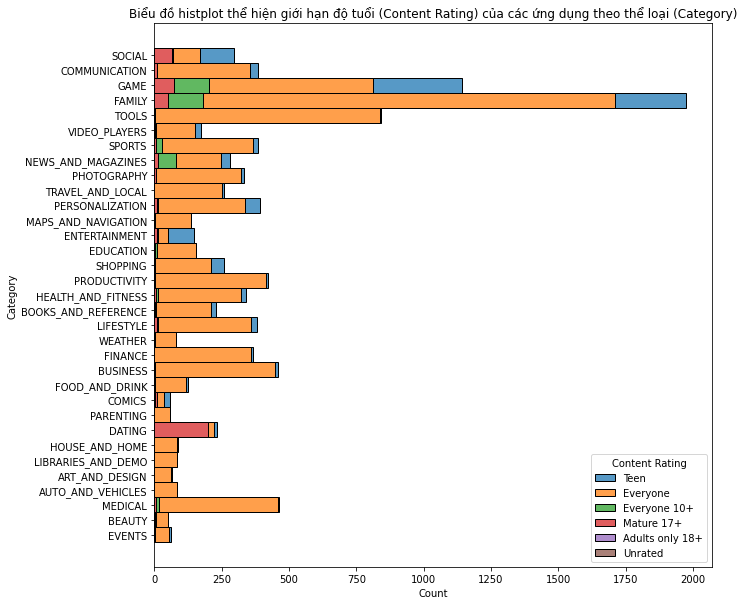

In [17]:
plt.figure(figsize=(10,10))
ax = sns.histplot(data = df, y = "Category", hue = "Content Rating", multiple='stack')
#plt.legend("Content Rating")
plt.title("Biểu đồ histplot thể hiện giới hạn độ tuổi (Content Rating) của các ứng dụng theo thể loại (Category)")
plt.show()

In [18]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Facebook,SOCIAL,4.1,78158306.0,-1.00,"1,000,000,000",Free,0,Teen,Social,3-Aug-18,Varies with device,Varies with device
1,Facebook,SOCIAL,4.1,78128208.0,-1.00,"1,000,000,000",Free,0,Teen,Social,3-Aug-18,Varies with device,Varies with device
2,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,-1.00,"1,000,000,000",Free,0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
3,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,-1.00,"1,000,000,000",Free,0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
4,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,-1.00,"1,000,000,000",Free,0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FQ India,LIFESTYLE,NaN,0.0,8.90,10,Free,0,Everyone,Lifestyle,31-Jul-18,7.2.2,4.1 and up
10836,Miss FQ,NEWS_AND_MAGAZINES,NaN,0.0,36.00,10,Free,0,Everyone,News & Magazines,5-Apr-18,3.8,4.4 and up
10837,Word Search Tab 1 FR,FAMILY,NaN,0.0,1.02,50,Paid,$1.04,Everyone,Puzzle,6-Feb-12,1.1,3.0 and up
10838,PLMGSS FR,PRODUCTIVITY,NaN,0.0,3.10,10,Free,0,Everyone,Productivity,1-Dec-17,1,4.4 and up


In [117]:
SCago = df['Category'].value_counts()
lst = list(SCago.index)
tmp = list(SCago[::].values)

In [118]:
TM_Cago = pd.DataFrame(lst, columns=['Category'])
TM_Cago['Number_per_Category'] = tmp

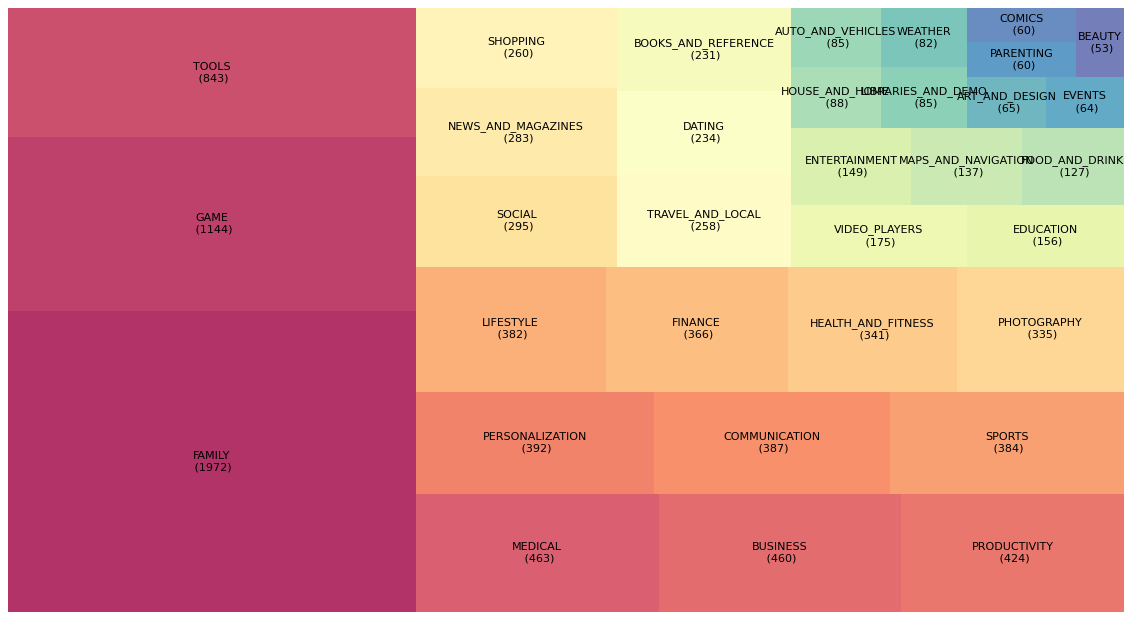

In [119]:
labels = TM_Cago.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis = 1)
sizes = TM_Cago['Number_per_Category'].values
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(18,10), dpi = 80)
squarify.plot(sizes = sizes, label = labels, color=colors, alpha=.8)

plt.axis('off')
plt.show()
#labels

In [124]:
SGend = df['Genres'].value_counts()
lst = list(SGend.index)
tmp = list(SGend[::].values)

In [125]:
TM_SGend = pd.DataFrame(lst, columns=['Genres'])
TM_SGend['Number_per_Genres'] = tmp

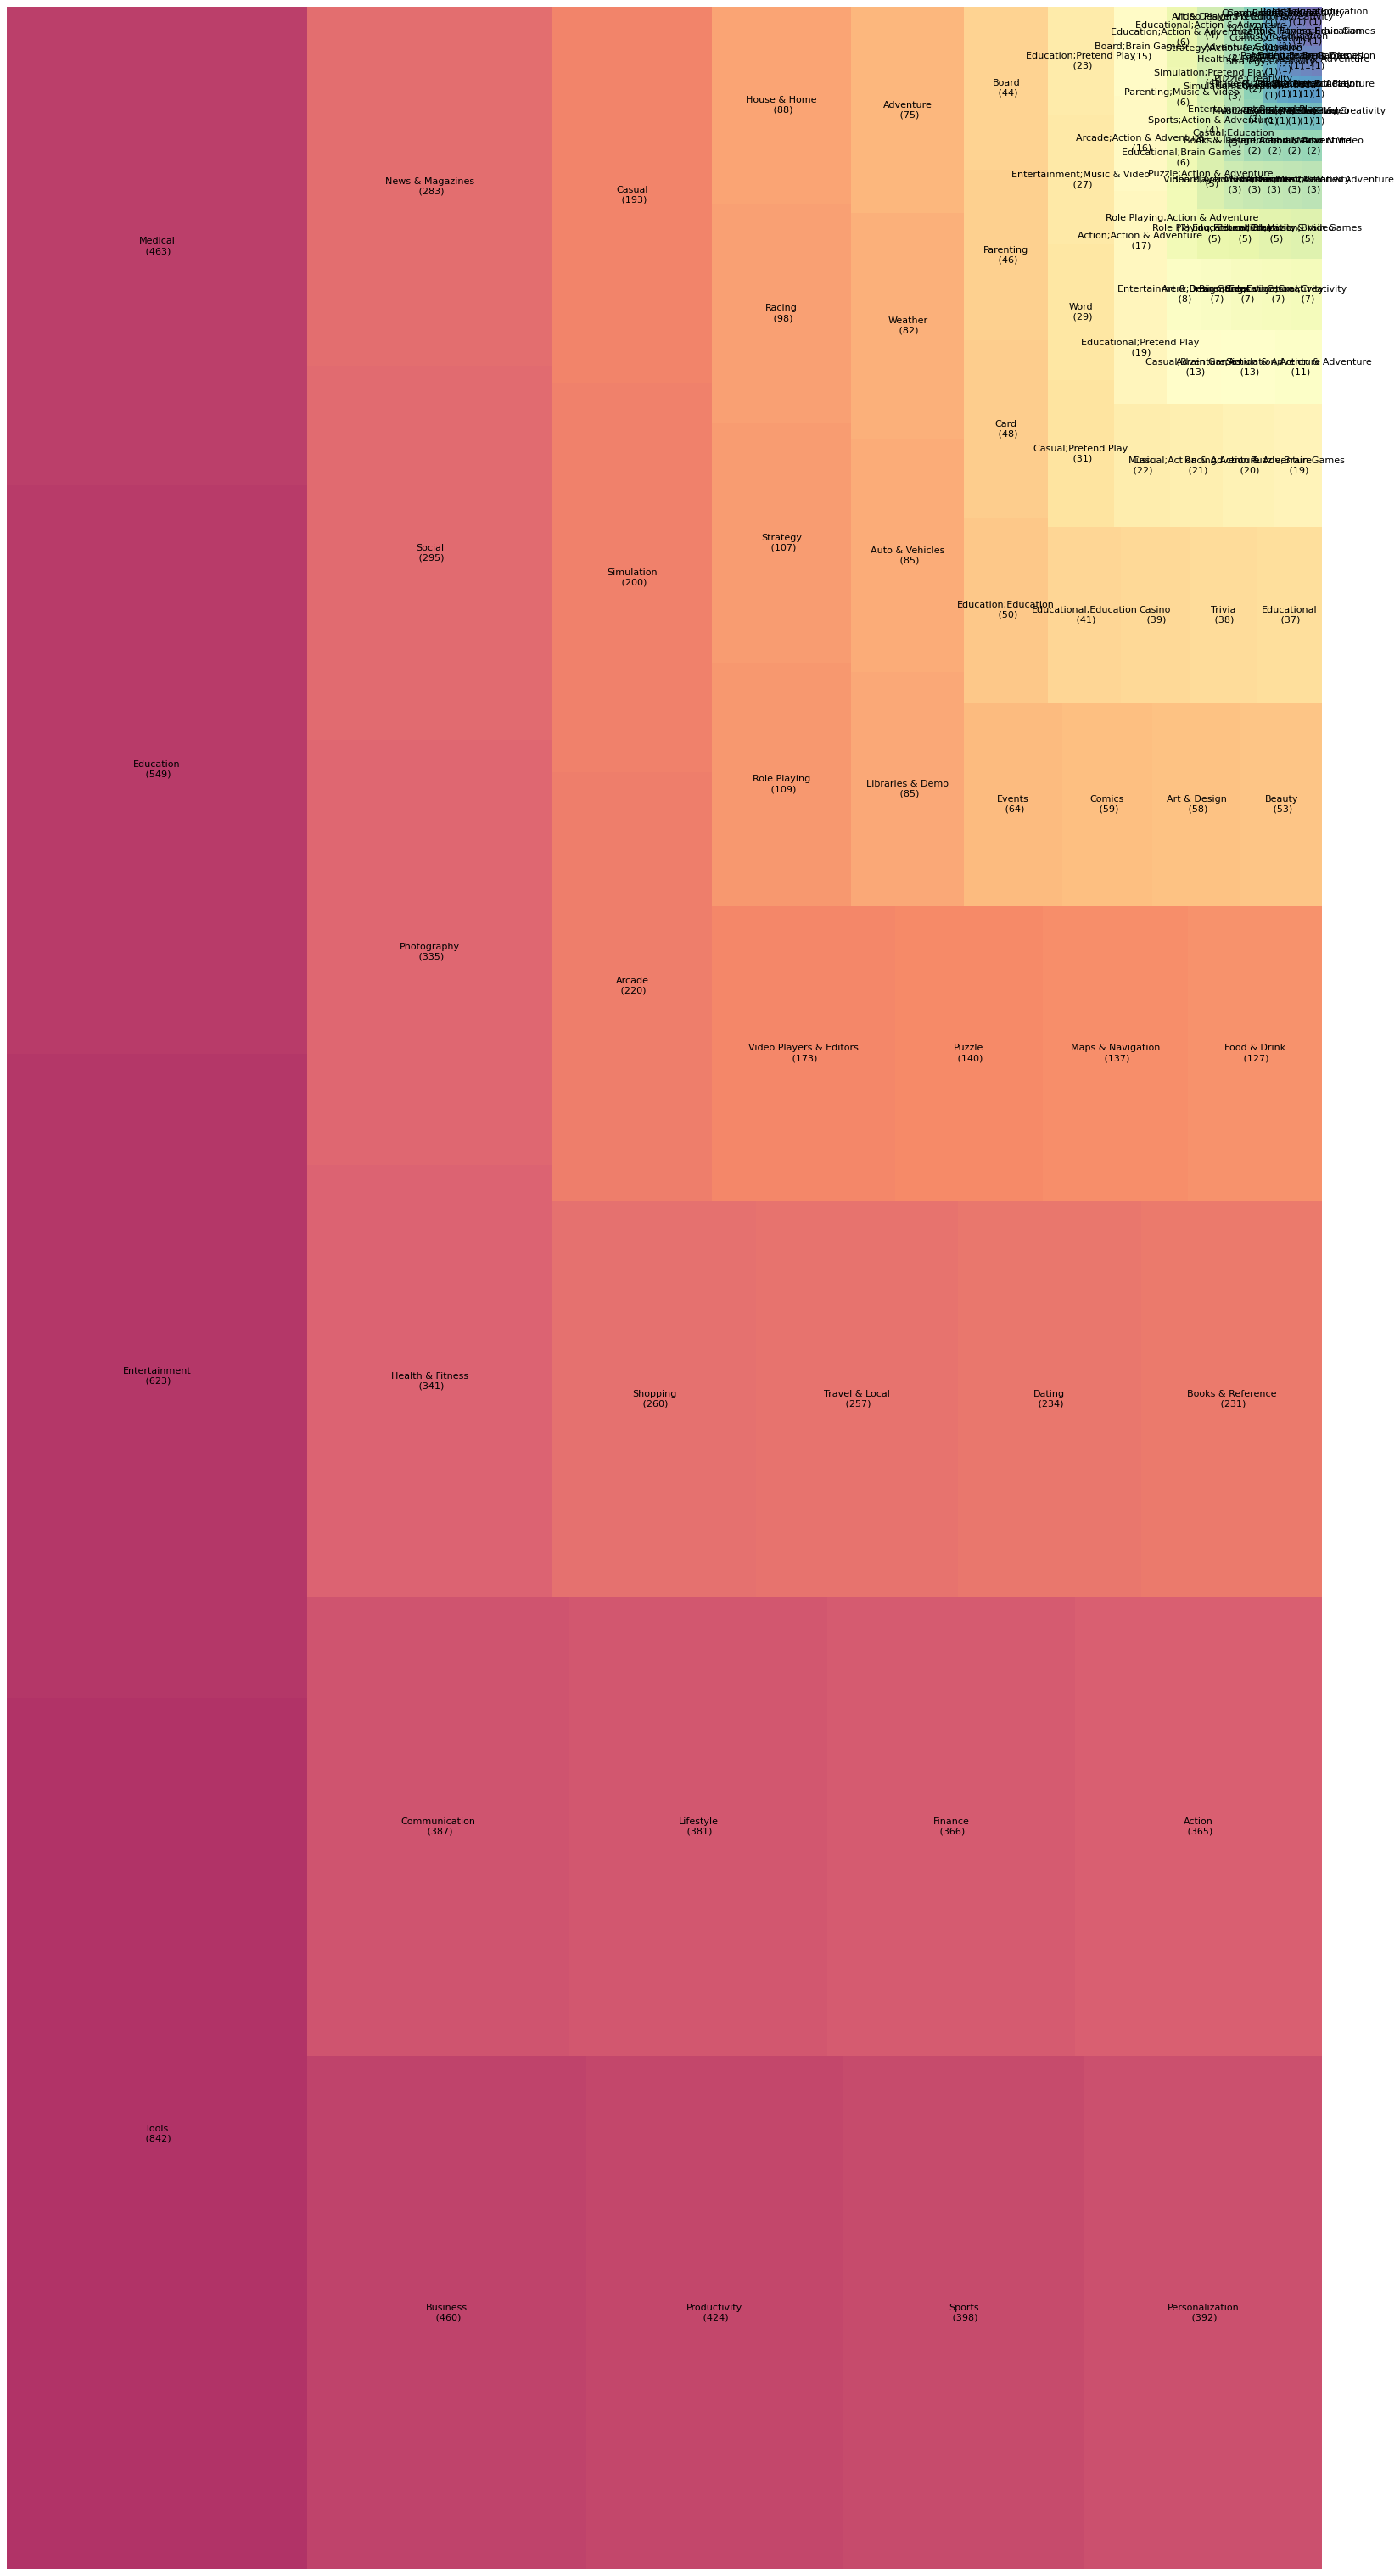

In [130]:
labels = TM_SGend.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis = 1)
sizes = TM_SGend['Number_per_Genres'].values
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(25,20), dpi = 80)
squarify.plot(sizes = sizes, label = labels, color=colors, alpha=.8)

plt.axis('off')
plt.show()
#labels